In [59]:
import requests
import pandas as pd
import plotly.graph_objects as go

In [60]:
r = requests.get('https://nbviewer.org/github/rogovich/Data/blob/master/docs/Plotly_HW/FairVote%20-%20Press%20Room.html')
r

<Response [200]>

In [61]:
range(r.text.find('<br><br>Rank&nbsp'), r.text.find('* Source: Washington Post'))

range(15527, 22237)

In [62]:
range(r.text.find('<br><br>Rank&nbsp;&nbsp;&nbsp; State&nbsp;&nbsp;&nbsp; Ad'), r.text.find('* Source: <a href='))

range(24787, 28731)

In [63]:
range(r.text.find('<br>Year&nbsp'), r.text.find(' 16<br><br>As the'))

range(30236, 34473)

In [64]:
table_1 = r.text[15527:22237]
table_2 = r.text[24787:28731]
table_3 = r.text[30236:34473]
tables = []
tables.append(table_1)
tables.append(table_2)
tables.append(table_3)

In [65]:
n = 0

for table in tables:
    table = table.replace('&nbsp', ';')
    table = ';'.join([letter for letter in table.split(';') if len(letter)>0])
    if n == 0:
        a = []
        for i in table.split('<br>')[2:-2]:
            a.append([x.strip(' ') for x in i.split(';')])
        n += n+1
    elif n == 1:
        b = []
        for i in table.split('<br>')[2:-1]:
            b.append([x.strip(' ') for x in i.split(';')])
        n += n+2
    elif n == 4:
        c = []
        for i in table.split('<br>')[1:]:
            c.append([x.strip(' ') for x in i.split(';')])

In [85]:
table_1 = pd.DataFrame(a[1:-1], columns=a[0])
table_2 = pd.DataFrame(b[1:-1], columns=b[0])
table_3 = pd.DataFrame(c[1:-1], columns=c[0])
object_tables = [table_1, table_2, table_3]

In [104]:
for table in object_tables:
    for column in table.columns:
        if column not in ['State', 'Ad $ spent']:
            table[column] = pd.to_numeric(table[column])

In [67]:
table_1.to_csv('table_1.csv', index=False)
table_2.to_csv('table_2.csv', index=False)
table_3.to_csv('table_3.csv', index=False)

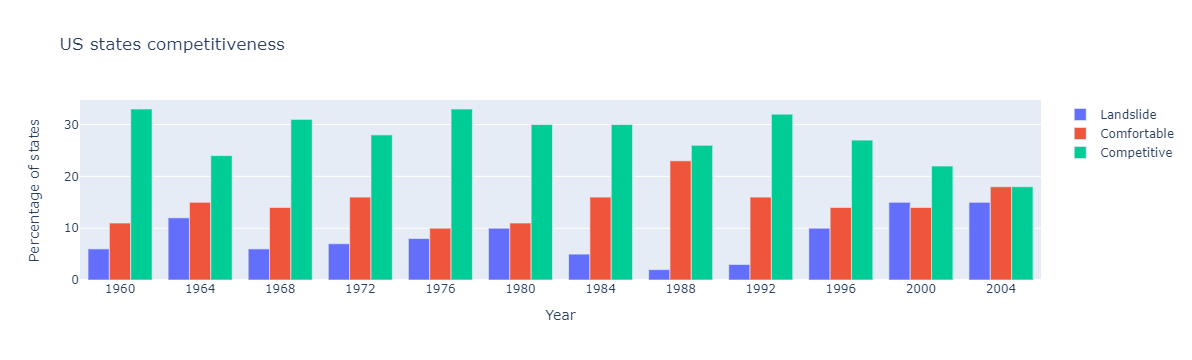

In [84]:
labels = ['Landslide', 'Comfortable', 'Competitive']

trace0 = go.Bar(x=table_3.Year,
                y=table_3.Landslide,
                name='Landslide')

trace1 = go.Bar(x=table_3.Year,
                y=table_3.Comfortable,
                name='Comfortable')

trace2 = go.Bar(x=table_3.Year,
                y=table_3.Competitive,
                name='Competitive')

layout = go.Layout(title='US states competitiveness', xaxis=dict(title='Year'), yaxis=dict(title='Percentage of states'))

fig = go.Figure([trace0, trace1, trace2], layout)
fig.show()


In [106]:
table_2.dtypes

Rank              int64
State            object
Ad $ spent       object
% of total      float64
Cumulative %    float64
dtype: object

In [ ]:
trace0 = go.Bar(y = [2, 3, 1])
trace1 = go.Bar(y = [4, 7, 3])

our_data = [trace0, trace1] # когда объектов больше одного - передаем их списком

fig = go.Figure(our_data) 
fig.show()

In [ ]:
layout = go.Layout(title = 'Just lines', xaxis = dict(title='X axis'),
                  yaxis = dict(title='Y axis'))